In [47]:
import tensorflow as tf 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [48]:
img_array = cv2.imread("train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

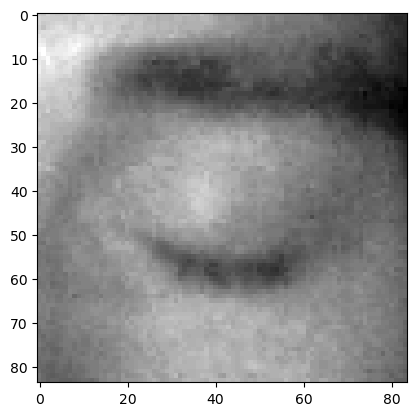

In [49]:
plt.imshow(img_array,cmap="gray")

In [50]:
img_array.shape

(84, 84)

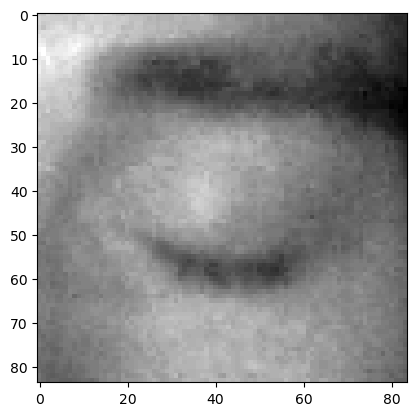

In [51]:
Datadirectory= "train/" ##training dataset
Classes = ["Closed_Eyes", "Open_Eyes"] ##list of classes
for category in Classes:  ## converting gray to rgb 
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_arry= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break  ##for just showing first image
    break

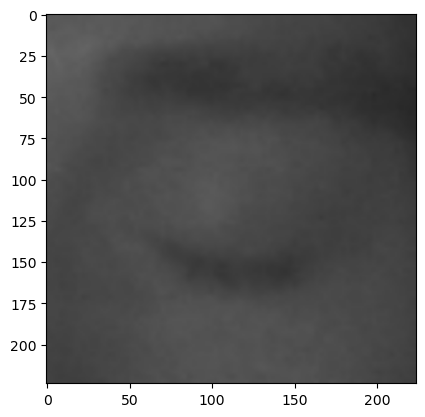

In [52]:
img_size= 224 ##converting size from 84*84 to 224*224 as most of the deep learning algorithms use this

new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [53]:
## reading all the images and converting them into an array for data and labels 

training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num= Classes.index(category) ## 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [54]:
create_training_data()

In [55]:
print(len(training_data))

4000


In [56]:
import random

random.shuffle(training_data) ## to avoid overfitting

In [57]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,img_size, img_size, 3)

In [58]:
X.shape

(4000, 224, 224, 3)

In [59]:
## normalise the data
X = X/255.0 

In [60]:
Y = np.array(y)

In [61]:
import pickle 

pickle_out = open("X.pickle", "wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [62]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [63]:
## deep learning model for training

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [82]:
# Load MobileNet model
base_model = tf.keras.applications.MobileNet(
    weights='imagenet',
    include_top=True,
    input_shape=(224, 224, 3)
)


In [84]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [86]:
## Transfer learning 

# Get the input
base_input = base_model.input

# Get the layer before the final classification layer
base_output = base_model.layers[-4].output

In [88]:
# Add new classification layers
x = layers.Flatten()(base_output)
x = layers.Dense(1)(x)
final_output = layers.Activation('sigmoid')(x)


In [90]:
# Create new model
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [92]:
new_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [144]:
## settings for binary classification (open/closed)

new_model.compile(loss="binary_crossentropy" , optimizer = "adam", metrics = ["accuracy"])

In [176]:
new_model.fit(X,Y, epochs = 30, validation_split = 0.1) ## training

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9863 - loss: 0.1850 - val_accuracy: 0.9925 - val_loss: 0.1196
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9940 - loss: 0.0854 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9979 - loss: 0.0330 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9986 - loss: 0.0222 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9971 - loss: 0.0452 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9970 - loss: 0.0437 - val_accuracy: 0.9975 - val_loss: 0.0399
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9983 - loss: 0.0158 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9993 - los

In [1]:
## checking the network for predictions

img_array = cv2.imread('new.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

NameError: name 'cv2' is not defined

In [ ]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [ ]:
X_input.shape

In [ ]:
plt.imshow(new_array)

In [200]:
X_input = X_input/255.0

In [202]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [204]:
prediction

array([[36.617443]], dtype=float32)